In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

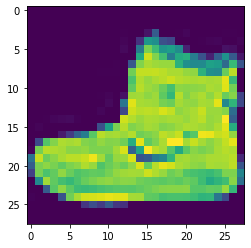

In [6]:
#이미지 불러오기
plt.figure()
plt.imshow(train_images[0])
plt.grid

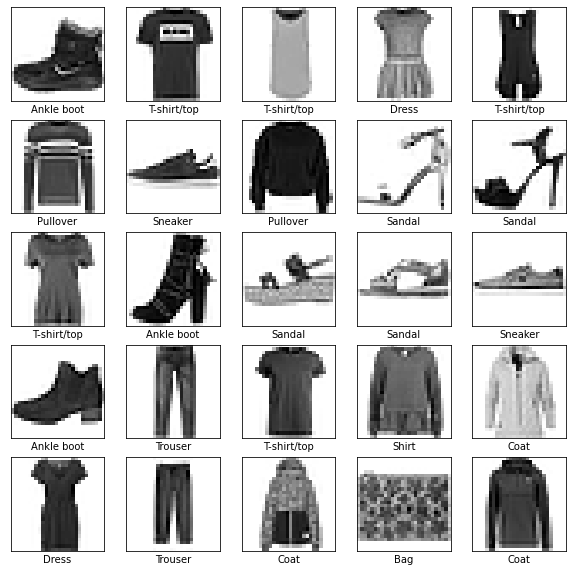

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [10]:
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds

In [12]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file(origin=dataset_url,
                               fname='flower_photos',
                               untar=True)
data_dir = pathlib.Path(data_dir)

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


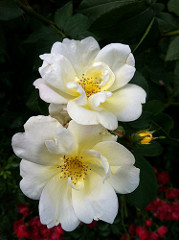

In [15]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [16]:
str(roses[0])

'C:\\Users\\Admin\\.keras\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [19]:
batch_size=32
img_height=180
img_width=180

In [20]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [21]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [22]:
class_names = train_ds.class_names

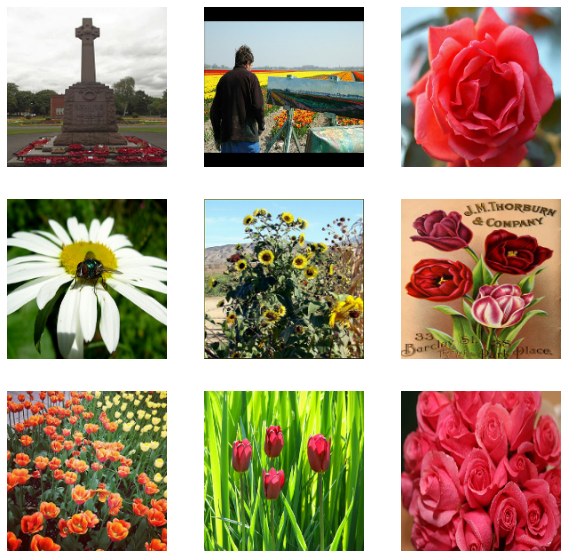

In [40]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))  #numpy() - tensor 행렬을  numpy행렬로 변환,uint8(0~255)
        plt.axis('off')

In [34]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [41]:
#0~1 사이로 표준화
from tensorflow.keras import layers
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [42]:
normalization_layer

In [43]:
normalization_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalization_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [46]:
#train_test split
#autotune = 버퍼사이즈 동적 변환으로 변경
#buffer_size = 한 신호에 설정된 값 만큼 데이터를 전송하는 것 (32의 배수 형태)
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>